[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


<ipython-input-76-e598cae4d1fa>:57: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1)


array([[ 0, 50,  0],
       [45,  0,  5],
       [ 0,  0, 50]], dtype=int64)

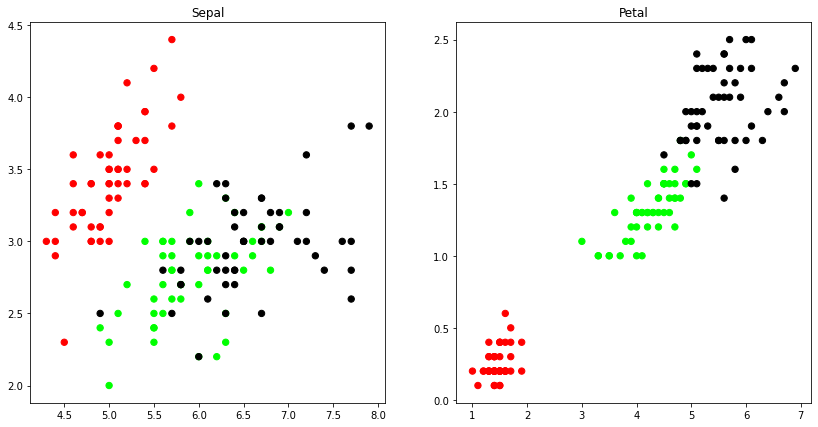

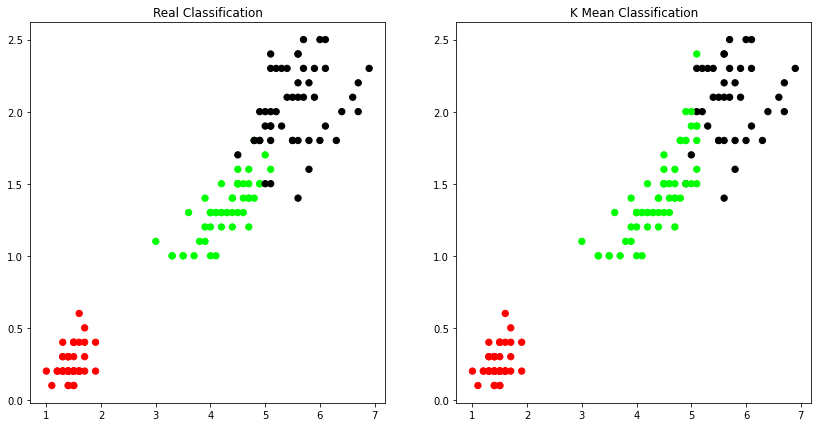

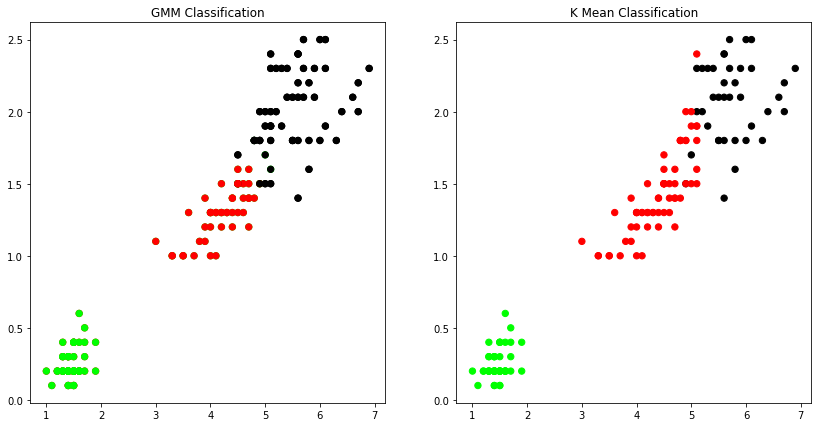

In [76]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import pandas as pd
import numpy as np
%matplotlib inline
iris = datasets.load_iris()
X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y = pd.DataFrame(iris.target)
y.columns = ['Targets']
plt.figure(figsize=(14,7))
colormap = np.array(['red', 'lime', 'black'])
plt.subplot(1, 2, 1)
plt.scatter(X.Sepal_Length,X.Sepal_Width, c=colormap[y.Targets], s=40)
plt.title('Sepal')
plt.subplot(1, 2, 2)
plt.scatter(X.Petal_Length,X.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Petal')
model = KMeans(n_clusters=3)
model.fit(X)
model.labels_
plt.figure(figsize=(14,7))
colormap = np.array(['red', 'lime', 'black'])
plt.subplot(1, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Classification')
plt.subplot(1, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[model.labels_], s=40)
plt.title('K Mean Classification')
predY = np.choose(model.labels_, [1,0,2]).astype(np.int64)
print (predY)
plt.figure(figsize=(14,7))
colormap = np.array(['red', 'lime', 'black'])
plt.subplot(1, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Classification')
plt.subplot(1, 2, 2)
plt.scatter(X.Petal_Length,X.Petal_Width, c=colormap[predY], s=40)
plt.title('K Mean Classification')
sm.accuracy_score(y, model.labels_)
sm.confusion_matrix(y, model.labels_)
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

scaler.fit(X)
xsa = scaler.transform(X)
xs = pd.DataFrame(xsa, columns = X.columns)
xs.sample(5)
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(xs)
y_cluster_gmm = gmm.predict(xs)
y_cluster_gmm
plt.subplot(1, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y_cluster_gmm], s=40)
plt.title('GMM Classification')
sm.accuracy_score(y, y_cluster_gmm)
sm.confusion_matrix(y, y_cluster_gmm)